In [24]:
#Aikasarjaennustaminen - ei trendiä eikä kausivaihtelua
#Yksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa ei ole havaittavaa trendiä tai kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [25]:
df=pd.read_excel('Saapuneet puhelut kktasolla.xlsx')
df

,Month,Saapuneet
0,2017-12-01,3714
1,2018-01-01,6185
2,2018-02-01,5615
3,2018-03-01,5381
4,2018-04-01,7284
5,2018-05-01,20116
6,2018-06-01,13238
7,2018-07-01,7594
8,2018-08-01,7968
9,2018-09-01,31344


In [26]:
df.index = pd.to_datetime(df['Month'],format="%Y-%m")
df=df.drop('Month',axis=1)
df

,Saapuneet
Month,
2017-12-01,3714
2018-01-01,6185
2018-02-01,5615
2018-03-01,5381
2018-04-01,7284
2018-05-01,20116
2018-06-01,13238
2018-07-01,7594
2018-08-01,7968


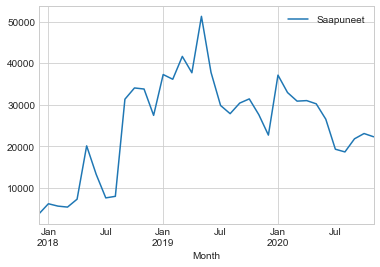

In [27]:
df.plot()

In [28]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'MS', koska kyseessä oN kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], freq = 'MS').fit()

In [29]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Kone-ennuste'] = malli.fittedvalues
df

,Saapuneet,Kone-ennuste
Month,,
2017-12-01,3714,4282.988211
2018-01-01,6185,3848.900152
2018-02-01,5615,5631.139272
2018-03-01,5381,5618.826424
2018-04-01,7284,5437.385739
2018-05-01,20116,6846.190323
2018-06-01,13238,16969.890277
2018-07-01,7594,14122.785583
2018-08-01,7968,9141.895283


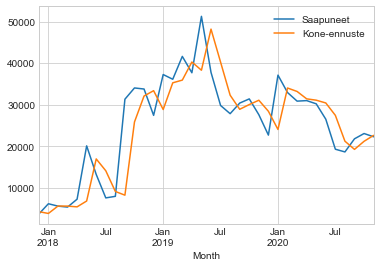

In [30]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [31]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Kone-ennuste,Ennustevirhe
Month,,,
2017-12-01,3714,4282.988211,-568.988211
2018-01-01,6185,3848.900152,2336.099848
2018-02-01,5615,5631.139272,-16.139272
2018-03-01,5381,5618.826424,-237.826424
2018-04-01,7284,5437.385739,1846.614261
2018-05-01,20116,6846.190323,13269.809677
2018-06-01,13238,16969.890277,-3731.890277
2018-07-01,7594,14122.785583,-6528.785583
2018-08-01,7968,9141.895283,-1173.895283


Text(0, 0.5, 'Ennustevirhe')

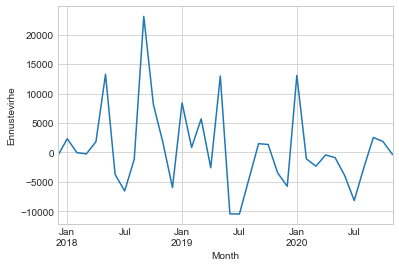

In [32]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

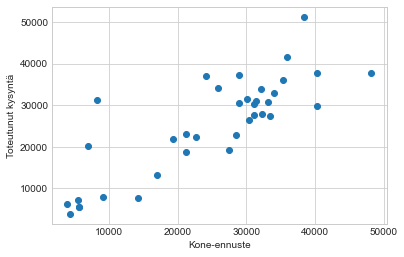

In [33]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Kone-ennuste'], y = df['Saapuneet'])
plt.xlabel('Kone-ennuste')
plt.ylabel('Toteutunut kysyntä')

In [34]:
malli.summary()

Dep. Variable:,endog,No. Observations:,36
Model:,ExponentialSmoothing,SSE,1723786433.487
Optimized:,True,AIC,640.634
Trend:,None,BIC,643.801
Seasonal:,None,AICC,641.924
Seasonal Periods:,None,Date:,"Thu, 28 Jan 2021"
Box-Cox:,False,Time:,11:50:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7629122,alpha,True
initial_level,4282.9882,l.0,True


In [35]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Kone-ennuste,Ennustevirhe
Month,,,
2020-07-01,19309,27456.714729,-8147.714729
2020-08-01,18656,21240.723601,-2584.723601
2020-09-01,21814,19268.806382,2545.193618
2020-10-01,23083,21210.565694,1872.434306
2020-11-01,22302,22639.068706,-337.068706


In [39]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-12-01', periods = 6, freq = 'MS')

# Ennusteet 12 viikolle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2020-12-01,22381.914871
2021-01-01,22381.914871
2021-02-01,22381.914871
2021-03-01,22381.914871
2021-04-01,22381.914871
2021-05-01,22381.914871


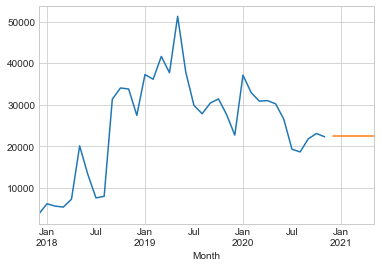

In [41]:
# Viivakaavio havainnoista
#Huomaa, että yksinkertainen eksponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [44]:
df.head()

,Saapuneet,Kone-ennuste,Ennustevirhe
Month,,,
2017-12-01,3714,4282.988211,-568.988211
2018-01-01,6185,3848.900152,2336.099848
2018-02-01,5615,5631.139272,-16.139272
2018-03-01,5381,5618.826424,-237.826424
2018-04-01,7284,5437.385739,1846.614261
